One ecommerce company has a project on predicting churned users in order to offer potential promotions.

An attached file is the dataset that is offered by the company (churn_predict.csv).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
import os
os.chdir("/content/drive/MyDrive/DAC 1 on 1 /ML/K35_Pham Thanh Tung_Project 3")
df = pd.read_excel("churn_prediction.xlsx")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5626,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5627,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5628,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31


1) CustomerID: Unique customer ID

2) Churn: Churn Flag

3) Tenure: Tenure of customer in organization

4) PreferredLoginDevice: Preferred login device of customer

5) CityTier: City tier (1,2,3): miền

6) WarehouseToHome: Distance in between warehouse to home of customer

7) PreferPaymentMethod: PaymentMode Preferred payment method of customer

8) Gender: Gender of customer

9) HourSpendOnApp: Number of hours spend on mobile application or website

10) NumberOfDeviceRegistered: Total number of devices is registered on particular customer

11) PreferedOrderCat: Preferred order category of customer in last month

12) SatisfactionScore: Satisfactory score of customer on service

13) MaritalStatus: Marital status of customer

14) NumberOfAddress: Total number of added added on particular customer

15) Complain: Any complaint has been raised in last month

16) OrderAmountHikeFromlastYear: Percentage increases in order from last year

17) CouponUsed: Total number of coupon has been used in last month

18) OrderCount: Total number of orders has been places in last month

19) DaySinceLastOrder: Day Since last order by customer

20) CashbackAmount: Average cashback in last month

## 1. EDA

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [4]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5626,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5627,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5628,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31
5629,55604,0,16.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Others,3,Married,7,0,NaN,1.0,5.0,15.0,313.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.shape

(5630, 20)

### a) Missing values

In [7]:
# Get missing value counts and convert to DataFrame
missing = df.isnull().sum().rename('isnull')

# Combine using pd.concat
check_missing = pd.concat([df.describe(), missing.to_frame().T])
check_missing

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030,NaN,NaN,NaN,NaN,NaN
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036,NaN,NaN,NaN,NaN,NaN
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,NaN,NaN,NaN,NaN,NaN
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,NaN,NaN,NaN,NaN,NaN
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,NaN,NaN,NaN,NaN,NaN
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,264.000000,0.000000,251.000000,255.000000,0.000000,0.000000,0.000000,0.000000,265.000000,256.000000,258.000000,307.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<Axes: >

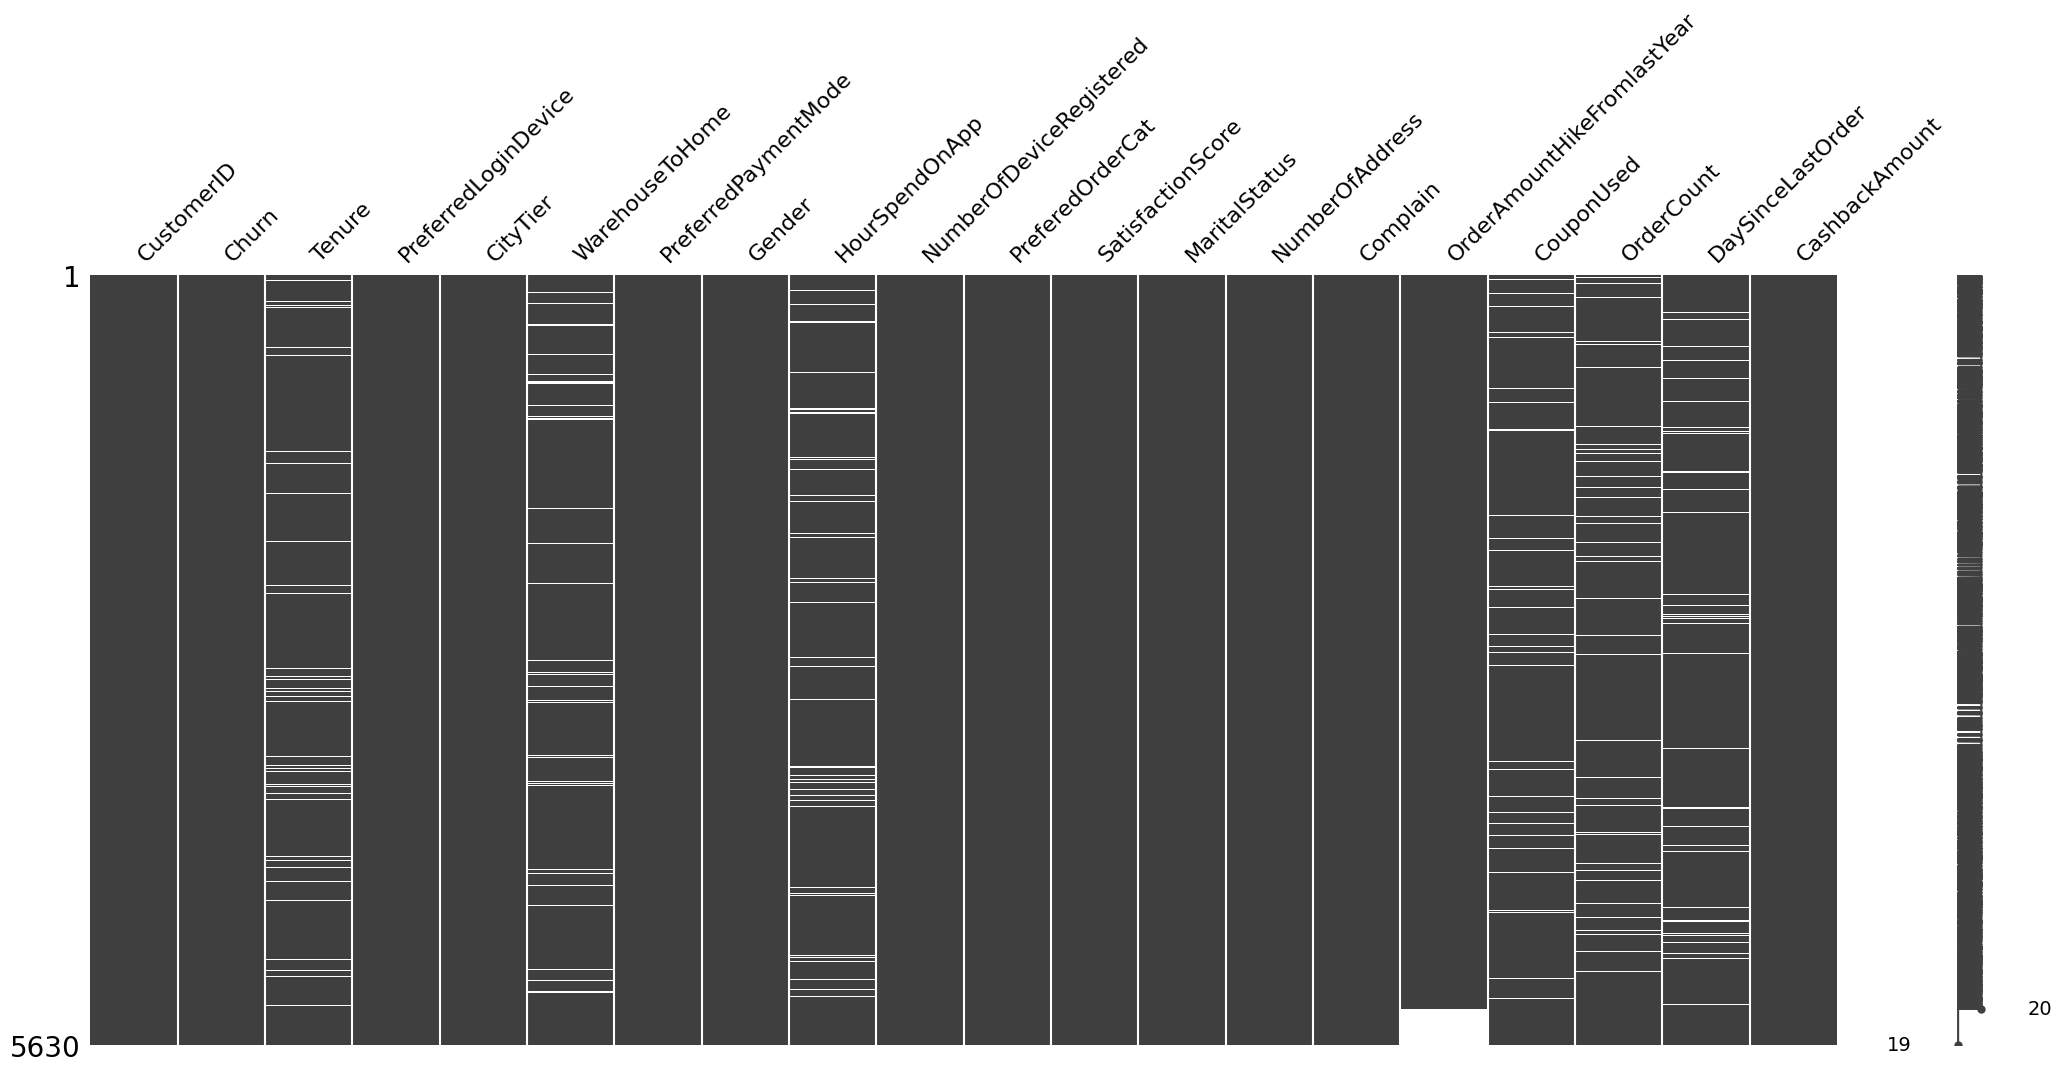

In [8]:
# check for missing values
import missingno as msno
msno.matrix(df)

In [9]:
# Thống kê số giá trị duy nhất cho biến liên tục
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Unique values in numeric columns:\n", df[continuous_cols].nunique())

Unique values in numeric columns:
 CustomerID                     5630
Churn                             2
Tenure                           36
CityTier                          3
WarehouseToHome                  34
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
SatisfactionScore                 5
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64


Since the columns **Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromLastYear, CouponUsed, OrderCount** and **DaySinceLastOrder** have missing values and outliers, we will replace the missing values with the median.

<Axes: >

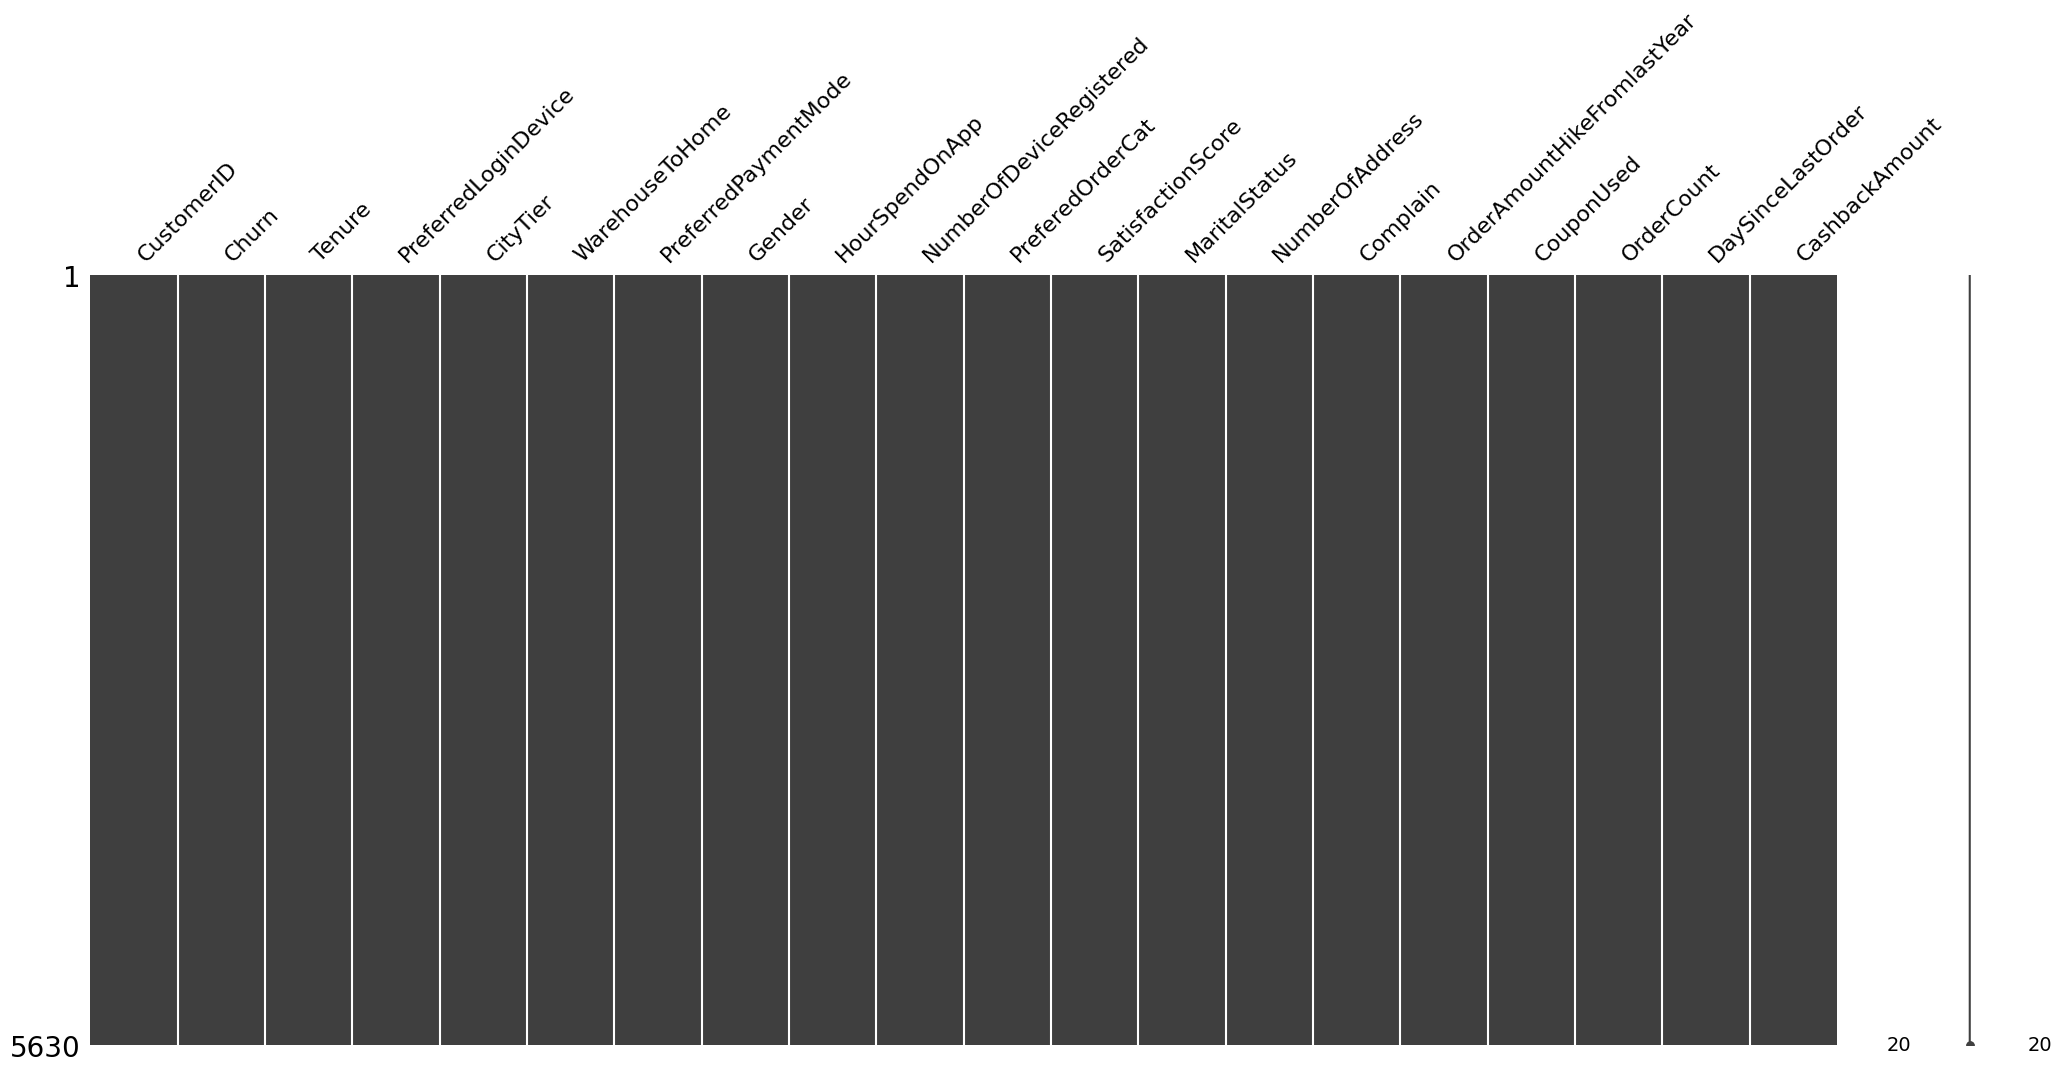

In [10]:
# Thay thế các giá trị thiếu (median cho biến số)
cols_with_missing = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                     'OrderAmountHikeFromlastYear', 'CouponUsed',
                     'OrderCount', 'DaySinceLastOrder']

for col in cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

msno.matrix(df)

In [11]:
# Kiểm tra lại
print("Missing values after fill:\n", df.isna().sum())

Missing values after fill:
 CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


### b) Duplicated Values

In [12]:
# Check for duplicate rows
# df.duplicated().any()
df.duplicated().sum()

np.int64(0)

### c) Same meaning values

In [13]:
#Check the unique values:
list_obj = df.loc[:, df.dtypes == object].columns.tolist()
for j in list_obj:
  print(f"Unique values of {j}: {df[j].unique()}")

Unique values of PreferredLoginDevice: ['Mobile Phone' 'Computer' 'Phone']
Unique values of PreferredPaymentMode: ['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card' 'COD' 'CC']
Unique values of Gender: ['Female' 'Male']
Unique values of PreferedOrderCat: ['Fashion' 'Laptop & Accessory' 'Mobile Phone' 'Grocery' 'Mobile' 'Others']
Unique values of MaritalStatus: ['Married' 'Single' 'Divorced']


In [14]:
#Replace the same meaning values:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile Phone':'Phone'})

#Recheck:
for j in list_obj:
  print(f"Unique values of {j}: {df[j].unique()}")

Unique values of PreferredLoginDevice: ['Phone' 'Computer']
Unique values of PreferredPaymentMode: ['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card']
Unique values of Gender: ['Female' 'Male']
Unique values of PreferedOrderCat: ['Fashion' 'Laptop & Accessory' 'Phone' 'Grocery' 'Mobile' 'Others']
Unique values of MaritalStatus: ['Married' 'Single' 'Divorced']


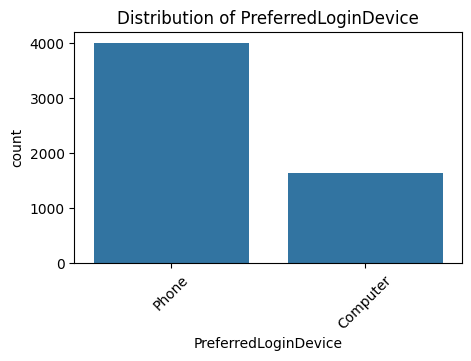

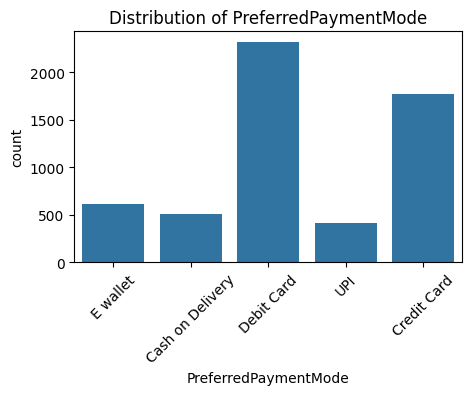

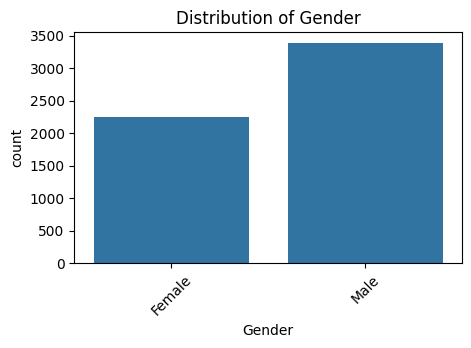

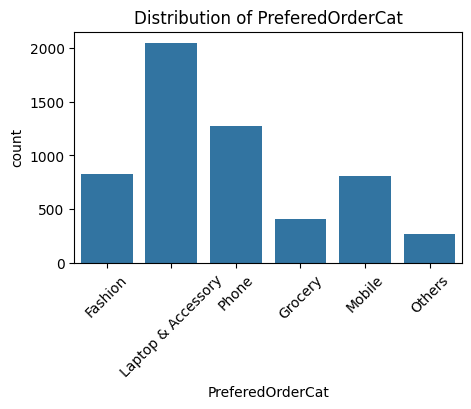

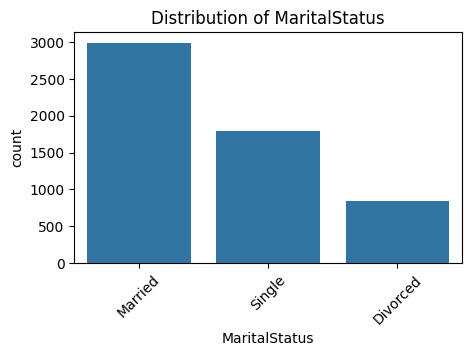

In [15]:
# Phân phối biến categorical
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Q1: What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.

1. Churned users usually are new users &rarr; Provide more promotion for new users, or increase the new users experience
2. Churned users usually receive less cashback than not churn &rarr; Increase the cashback ratio
3. Churned users complain more &rarr; deep dive what these churned users complain about, and provide the solution

### Outlier Detection

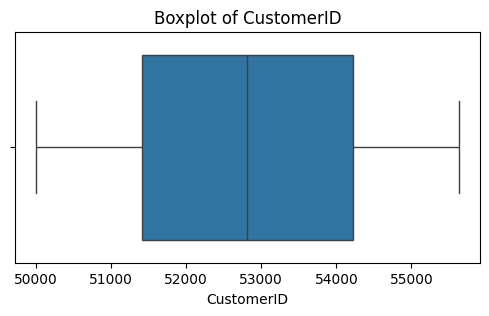

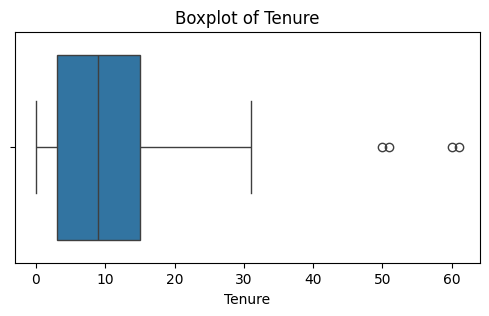

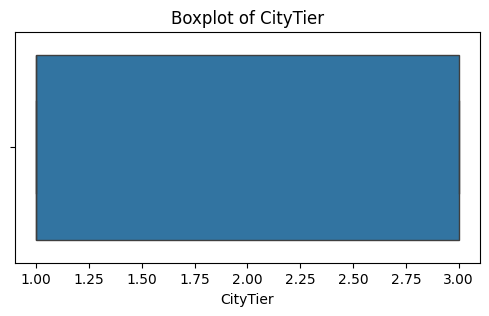

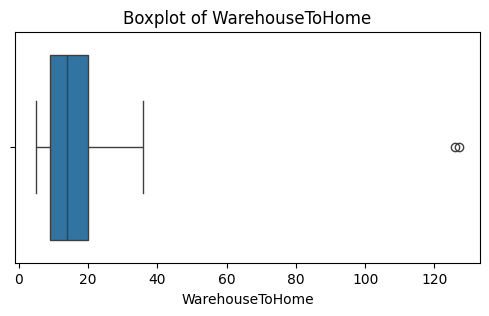

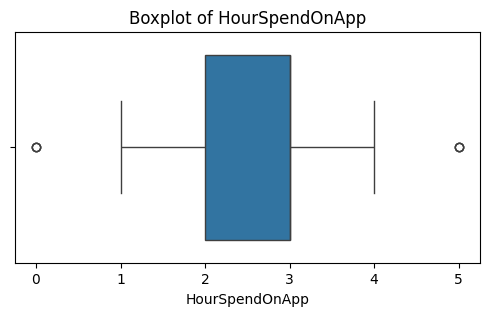

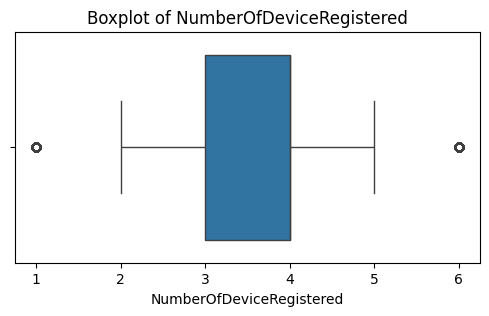

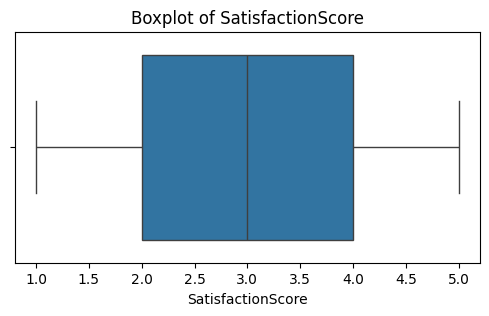

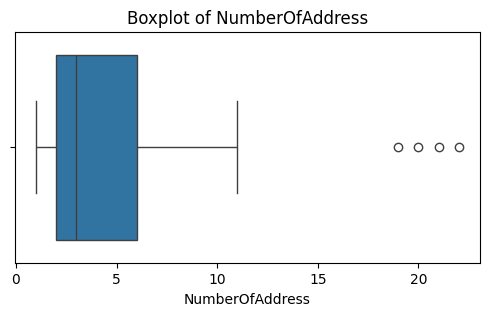

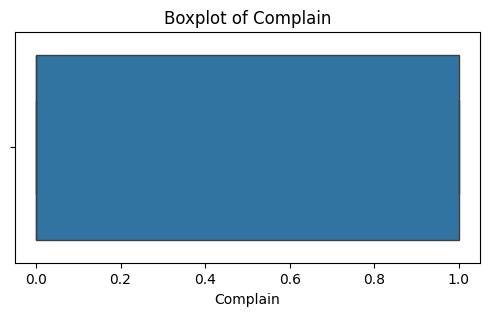

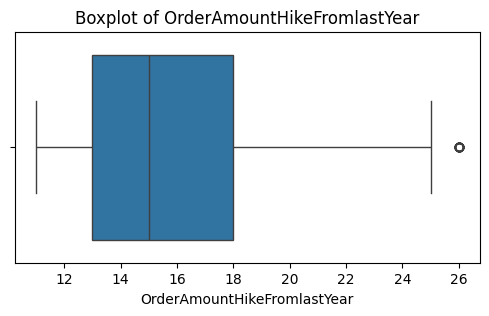

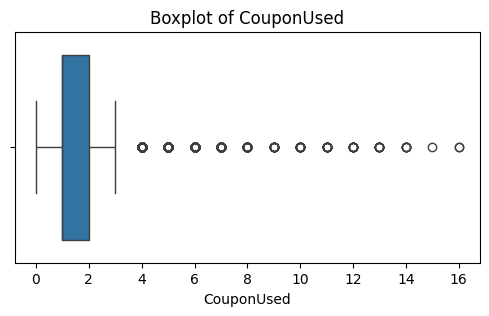

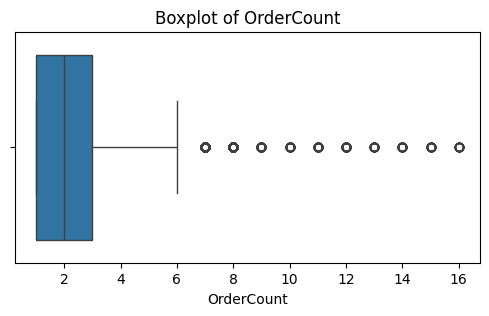

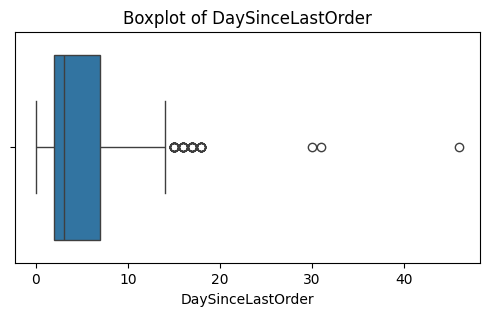

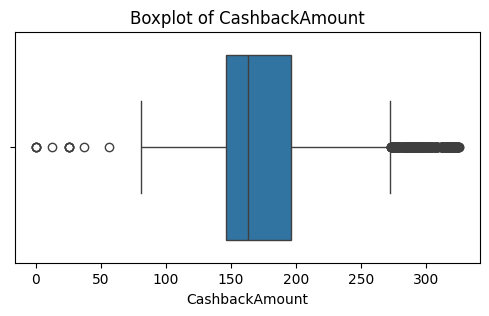

In [16]:
# Kiểm tra Outliers (Boxplot)
for col in continuous_cols:
    if col != 'Churn':
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

## EDA by applying Random Forest first

In [17]:
# Encoding:
cate_columns = df.loc[:, df.dtypes == object].columns.tolist()
cate_columns

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [18]:
encoded_df = pd.get_dummies(df, columns = cate_columns,drop_first=True)
# Bỏ CustomerID (không cần thiết)
encoded_df.drop(columns=['CustomerID'], inplace=True)

encoded_df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single
0,0,20.0,3,7.0,4.0,4,5,3,0,26.0,...,True,False,False,False,False,False,False,False,True,False
1,0,13.0,1,9.0,4.0,4,3,2,0,26.0,...,False,False,False,False,False,False,False,False,False,True
2,0,16.0,3,7.0,3.0,4,3,3,0,26.0,...,False,False,True,False,True,False,False,False,False,False
3,0,5.0,1,16.0,3.0,4,4,3,0,26.0,...,False,False,True,False,False,False,False,False,True,False
4,0,9.0,1,28.0,3.0,4,2,3,1,26.0,...,False,False,False,False,True,False,False,False,False,False


In [19]:
# Applying initial Random Forest (without splitting train/test):
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

x=encoded_df.drop('Churn', axis = 1)
y=encoded_df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Normalization:
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [20]:
clf_ranf = RandomForestClassifier()
clf_ranf.fit(x_train_scaled,y_train)

y_pred = clf_ranf.predict(x_test_scaled)

print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_pred)}')

Balance accuracy of test set: 0.8545922062871215


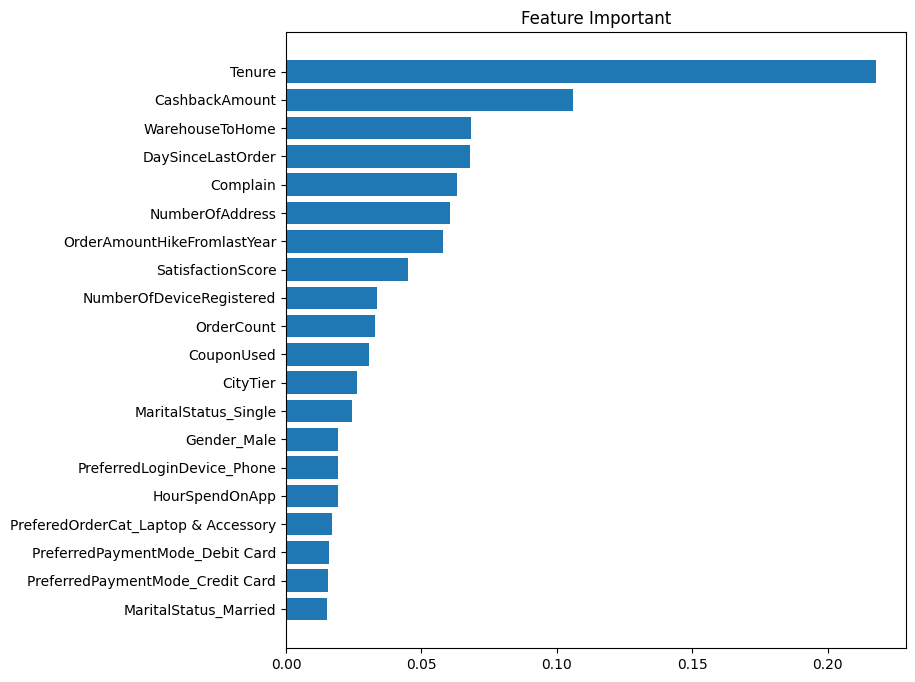

In [21]:
#Show Feature Importance:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x.columns, clf_ranf.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(8, 8))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

As Feature Importance show, we can see these features can have high relation with target columns:
* Tenure
* Cashback amount
* Distance from warehouse to home
* Complain
* Days since Last order

&rarr; We will analyse and visualize these features for more insights.


## **Analyse features from initial Random Forest model:**

* Tenure
* Cashback amount
* Distance from warehouse to home
* Complain
* Days since Last order

In [22]:
def count_percentage(df, column, target, count):
    '''
    This function to create the table calculate the percentage of fraud/non-fraud
    transaction on total transaction group by category values
    '''

    # Create 2 dataframes of fraud and non-fraud
    fraud = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_fraud = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = fraud.merge(not_fraud, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'fraud',count+'_y':'not_fraud'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['fraud']/(cate_df['fraud']+cate_df['not_fraud'])
    cate_df = cate_df.sort_values(by='%', ascending=False)

    return cate_df

### **1. Tenure**  New users are churned more than old users (tenure = 0 or 1)

<Axes: xlabel='Tenure', ylabel='%'>

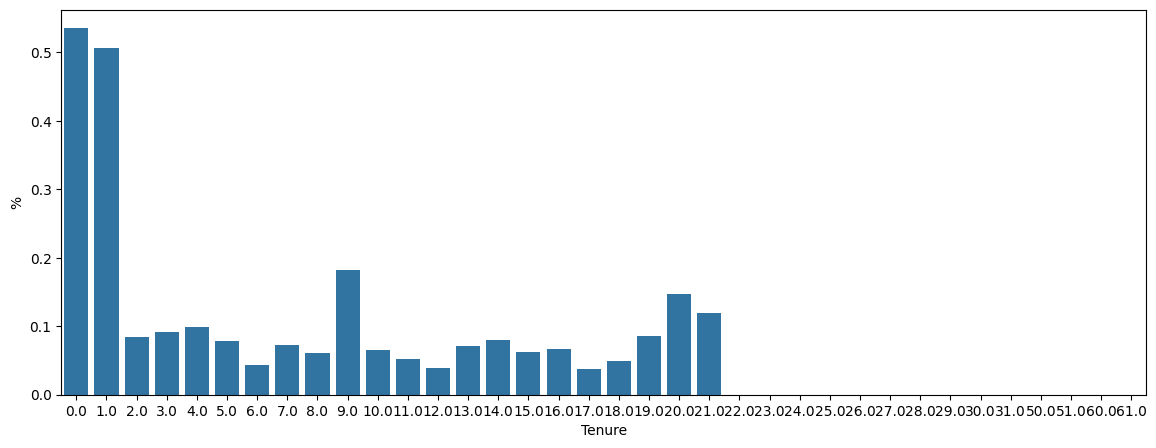

In [23]:
plot_df = count_percentage(df, 'Tenure', 'Churn', 'CustomerID')
#Visualize the data:
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(data=plot_df, x='Tenure',y='%', ax=ax)

<Axes: xlabel='Tenure', ylabel='CustomerID'>

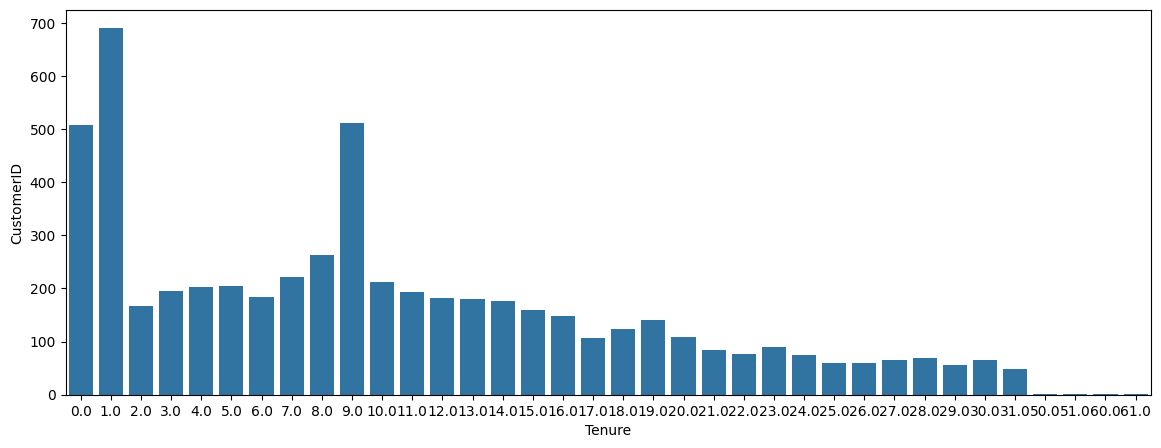

In [24]:
count_df = df.groupby('Tenure')[['CustomerID']].count().reset_index()
#Visualize the data:
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(data=count_df, x='Tenure',y='CustomerID', ax=ax)

### **2. Warehouse to home**  Not significantly related

<Axes: xlabel='Churn', ylabel='WarehouseToHome'>

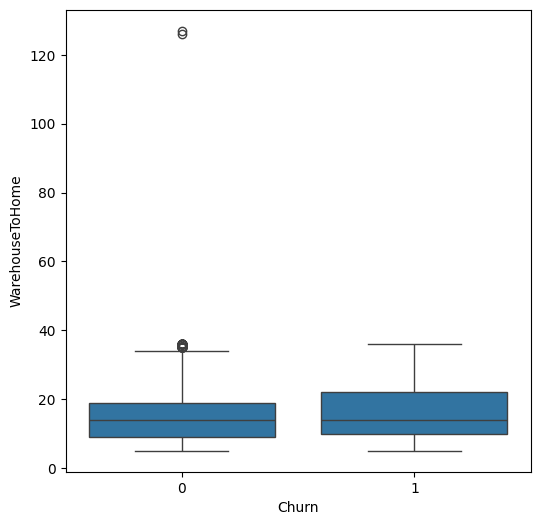

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=df, x='Churn',y='WarehouseToHome',ax=ax)

<Axes: xlabel='Churn', ylabel='WarehouseToHome'>

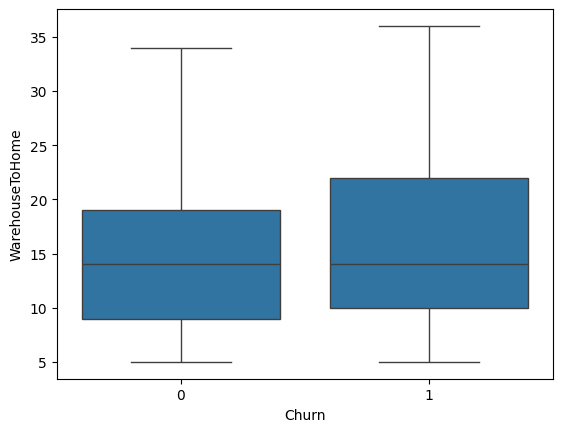

In [26]:
sns.boxplot(data=df, x='Churn',y='WarehouseToHome', showfliers = False)

For both churn & not churn:
* The median, pt25, mean, pt75 is quite the same --> The centralize of data is the same
* For not churn, data has some outliers --> This can be not significant enough to consider it as an insight for not churn

&rarr; There're no strong evidences show that there different between churn and not churn for warehousetohome --> We will exclude this features when apply model for not being bias.

### **3. Days since last order:** churn users with complain = 1 have higher days since orders than churned users with complain = 0

<Axes: xlabel='Churn', ylabel='DaySinceLastOrder'>

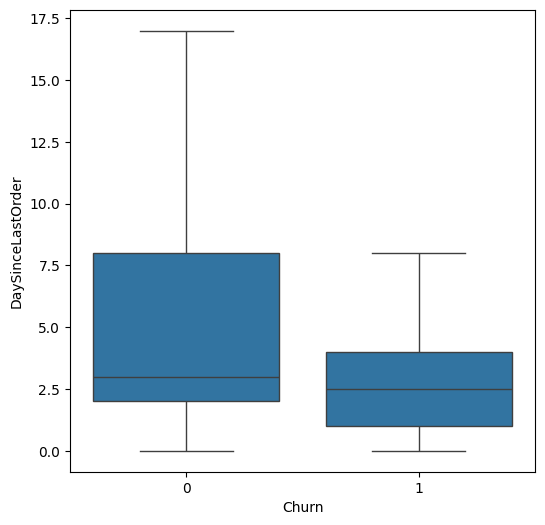

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=df, x='Churn',y='DaySinceLastOrder',ax=ax, showfliers = False)

From this chart, we see for churned users, they had orders recently (the day since last order less than not churned users) --> This quite strange, we should monitor more features for this insight (satisfaction_score, complain,..)

<Axes: xlabel='Complain', ylabel='DaySinceLastOrder'>

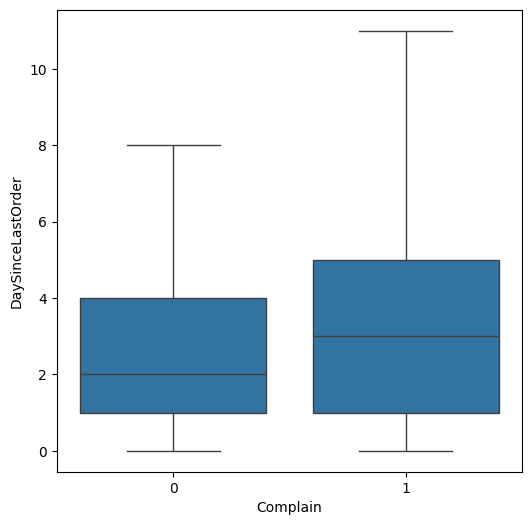

In [28]:
churn_df = df[df['Churn']==1]
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=churn_df, x='Complain',y='DaySinceLastOrder',ax=ax, showfliers = False)

For churned users with complain = 1, they had daysincelastorder higher than churn users with compain = 0

### **4. Cashback amount**  Churn users recevied cashback amount less than not churn users.

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

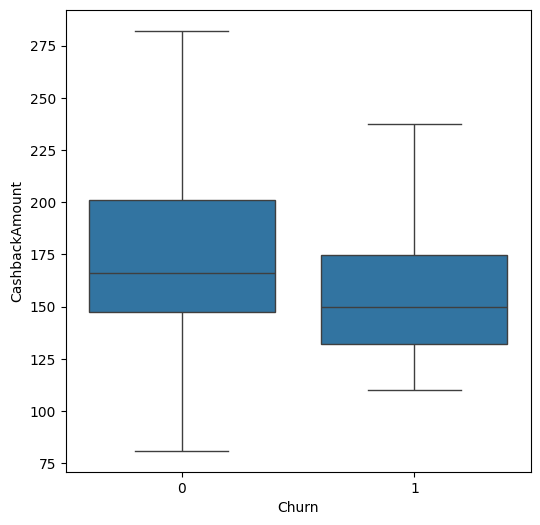

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=df, x='Churn',y='CashbackAmount',ax=ax, showfliers = False)

Churn users recevied cashback amount less than not churn users.

### **5. Complain** The number of users complain on churn is higher than not churn

<Axes: xlabel='Complain', ylabel='%'>

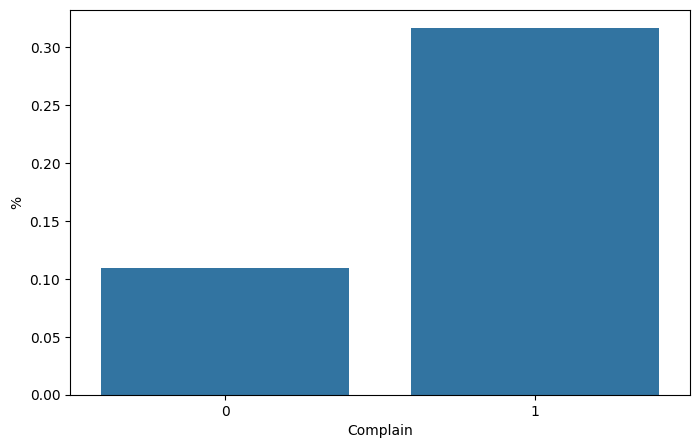

In [32]:
plot_df = count_percentage(df, 'Complain', 'Churn', 'CustomerID')
#Visualize the data:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=plot_df, x='Complain',y='%', ax=ax)

### **6. Conclusion & Suggestion**

1. Churned users usually are new users &rarr; Provide more promotion for new users, or increase the new users experience
2. Churned users usually receive less cashback than not churn &rarr; Increase the cashback ratio
3. Churned users complain more &rarr; deep dive what these churned users complain about, and provide the solution

# Q2: Build the Machine Learning model for predicting churned users. (fine tuning)

**Supervised ML + Fine-tuning**

## Select Top Features & Prepare Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chọn top features có tầm quan trọng cao nhất (giả sử bạn đã tìm ở bước trước)
top_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder']

X = df[top_features]
y = df['Churn']

# Chia 70% train / 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Tiếp tục chia temp thành 50% val + 50% test (tức 15% - 15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (3941, 5), Val: (844, 5), Test: (845, 5)


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Select multiple base models & Compare

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

# -- Chọn tiêu chí so sánh: RECALL vì muốn phát hiện churn đúng nhiều nhất --

In [ ]:
# 2.1 Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_val_rf = rf.predict(X_val_scaled)
recall_rf = recall_score(y_val, y_pred_val_rf)
print(f"Random Forest Recall: {recall_rf:.4f}")

Random Forest Recall: 0.8239


In [ ]:
# 2.2 Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_val_lr = lr.predict(X_val_scaled)
recall_lr = recall_score(y_val, y_pred_val_lr)
print(f"Logistic Regression Recall: {recall_lr:.4f}")

Logistic Regression Recall: 0.4225


In [ ]:
# 2.3 KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_val_knn = knn.predict(X_val_scaled)
recall_knn = recall_score(y_val, y_pred_val_knn)
print(f"KNN Recall: {recall_knn:.4f}")

KNN Recall: 0.5986


In [ ]:
# 2.4 XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_val_xgb = xgb_model.predict(X_val_scaled)
recall_xgb = recall_score(y_val, y_pred_val_xgb)
print(f"XGBoost Recall: {recall_xgb:.4f}")

XGBoost Recall: 0.7676


In [ ]:
# 2.5 Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_val_gb = gb_model.predict(X_val_scaled)
recall_gb = recall_score(y_val, y_pred_val_gb)
print(f"Gradient Boosting Recall: {recall_gb:.4f}")

Gradient Boosting Recall: 0.5493


## Fine-tune the BEST model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1. Khởi tạo mô hình cơ bản
rf_base = RandomForestClassifier(random_state=42)

# 2 Tạo grid tham số để RandomizedSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# 3 RandomizedSearchCV với scoring là Recall
rf_finetune = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid_rf,
    n_iter=30,  # số vòng thử nghiệm
    cv=5,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1  # tận dụng nhiều CPU core
)

# 4 Fit trên train set
rf_finetune.fit(X_train_scaled, y_train)

# 5 Kết quả tốt nhất
print("Best Params RF:", rf_finetune.best_params_)
print("Best CV Recall:", rf_finetune.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params RF: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': False}
Best CV Recall: 0.7575529733424471


## Best RF score on test set

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

# Lấy best model
best_rf = rf_finetune.best_estimator_

# Predict trên val & test
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Tính các chỉ số
recall_val = recall_score(y_val, y_val_pred)
recall_test = recall_score(y_test, y_test_pred)

precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Val Recall: {recall_val:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test F1-score: {f1_test:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Val Recall: 0.8521
Test Recall: 0.8662
Test Precision: 0.7785
Test F1-score: 0.8200
Confusion Matrix:
[[668  35]
 [ 19 123]]


## Check feature importance

CashbackAmount       0.350473
Tenure               0.317807
WarehouseToHome      0.161063
DaySinceLastOrder    0.102113
Complain             0.068544
dtype: float64


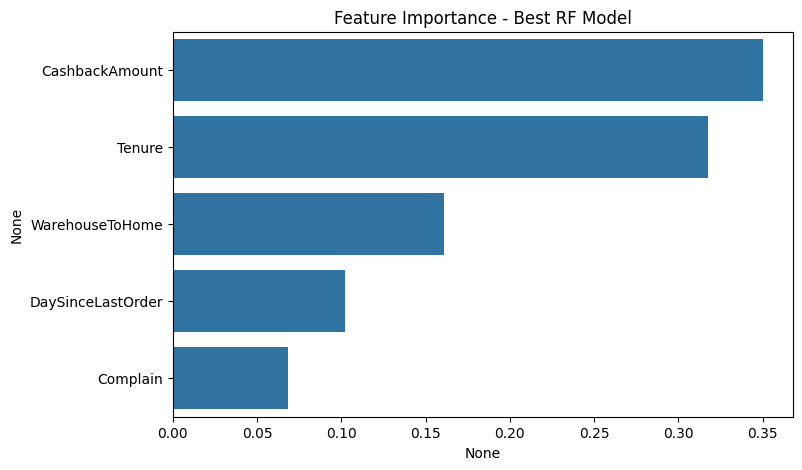

In [ ]:
# Tầm quan trọng của feature
importances = pd.Series(
    best_rf.feature_importances_,
    index=top_features
).sort_values(ascending=False)

print(importances)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Best RF Model")
plt.show()

# Q3: Based on the behaviors of churned users, the company would like to offer some special promotions for them. Please segment these churned users into groups. What are the differences between groups?

In [ ]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
# Filter churned users
df_churned = df[df['Churn'] == 1].copy()
print(f"Số lượng khách hàng churned: {df_churned.shape[0]}")

Số lượng khách hàng churned: 948


In [ ]:
# One-Hot Encoding các biến danh mục
df_churned_encoded = pd.get_dummies(
    df_churned,
    columns=['PreferredLoginDevice', 'PreferredPaymentMode',
             'PreferedOrderCat', 'MaritalStatus'],
    drop_first=True
)

# Label Encoding cho Gender
le = LabelEncoder()
df_churned_encoded['Gender'] = le.fit_transform(df_churned_encoded['Gender'])

# Drop các biến không cần thiết
df_churned_encoded.drop(columns=['CustomerID', 'Churn'], inplace=True)

# Scale dữ liệu (RobustScaler kháng outlier)
scaler = RobustScaler()
df_churned_scaled = scaler.fit_transform(df_churned_encoded)

## Apply PCA for dimensionality reduction & visualization

In [ ]:
# PCA giữ 90% variance
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(df_churned_scaled)

print(f'Số thành phần PCA giữ lại: {pca_result.shape[1]}')
print("Variance ratio:", pca.explained_variance_ratio_)

# Convert sang DataFrame
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PCA_{i+1}" for i in range(pca_result.shape[1])]
)

Số thành phần PCA giữ lại: 14
Variance ratio: [0.39759184 0.08538567 0.06366591 0.0548049  0.04298219 0.04007348
 0.03578791 0.03437159 0.03180982 0.03102237 0.02544094 0.02201505
 0.01918014 0.01790271]


## Determine the appropriate number of Clusters: Elbow + Silhouette

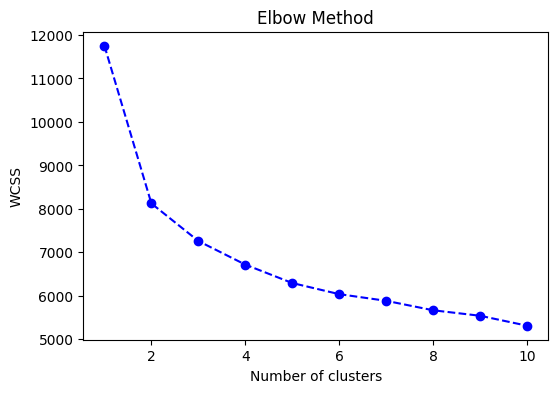

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, wcss, 'bo--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Silhouette Score cho K từ 2 đến 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(pca_df)
    sil = silhouette_score(pca_df, labels)
    print(f"K={k} → Silhouette Score: {sil:.4f}")

K=2 → Silhouette Score: 0.4510
K=3 → Silhouette Score: 0.1600
K=4 → Silhouette Score: 0.1313
K=5 → Silhouette Score: 0.1200
K=6 → Silhouette Score: 0.1237


- PCA can not keep the significant meaning of the data (the sum of explained_variance_ratio is too small)
- When applying Elbow method, we see there're no clear elbow points.
- Our hypothesis is that the data is sporadic, which means there're no clearly common patterns between data, and we can not cluster them into groups.

**Our suggestions for next steps:**

* We can collect more data of churned users: by collect real data or using our above supervised model to predict and use it as ground truth data for clustering model

* Business can offer the promotion for all churned users and collect results. These results can be used as features in the data for the next model.